# Deep Learning Project
## Classification

In [3]:
# import libraries
import numpy as np  
import pandas as pd 
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg # For displaying images
%matplotlib inline
from keras import models
# from keras import layers
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from tensorflow.keras.utils import plot_model

import os
import tensorflow as tf

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
PATH = "/nfs/home/twd1956/DeepLearning/Project/"

train_dir = os.path.join(PATH, 'Training')
validation_dir = os.path.join(PATH, 'Validation')

BATCH_SIZE = 48
IMG_SIZE = (250, 250)

In [6]:
train_datagen = ImageDataGenerator( # Data Augumentation for test data
                rescale=1./255,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3
                )

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_gen=train_datagen.flow_from_directory(train_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=BATCH_SIZE,
                                            class_mode='binary')

Found 47009 images belonging to 2 classes.


In [8]:
valid_gen=test_datagen.flow_from_directory(validation_dir,
                                           target_size=(250,250),
                                           batch_size=48,
                                           class_mode='binary', 
                                           shuffle=False)

Found 11649 images belonging to 2 classes.


## Sample Plots of Images Generated With Data Augmentation

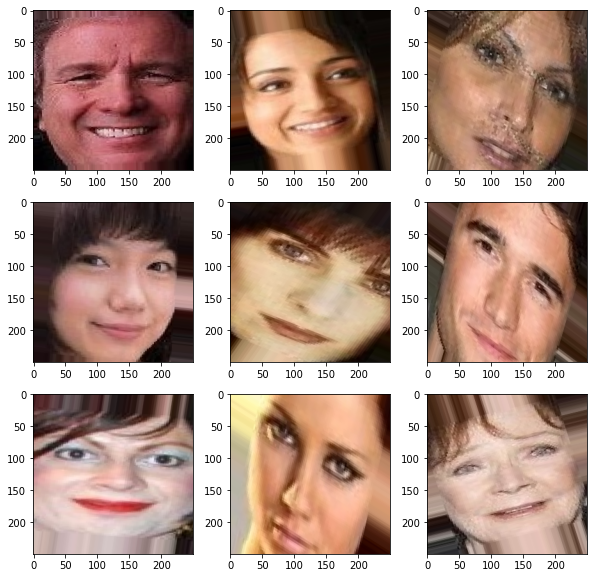

In [90]:
x= train_gen.next()[0]
plt.figure(figsize=(10, 10))
for i in range(0,9):
    ax = plt.subplot(3, 3, i + 1)
    image = x[i]
    plt.imshow(image)

## Build the model

In [9]:
kernel_s = (3,3)

In [10]:
model=models.Sequential()
model.add(Conv2D(32,kernel_s,activation='relu',input_shape=(250,250,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,kernel_s,activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,kernel_s,activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,kernel_s,activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,kernel_s,activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# model.summary()

In [11]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [13]:
history=model.fit(train_gen,
                  steps_per_epoch=70,
                  epochs=50,
                  validation_data=valid_gen,
                  validation_steps=50, 
                  verbose=1)

Epoch 1/50
70/70 [==============================] - 82s 1s/step - loss: 0.7008 - acc: 0.5750 - val_loss: 0.6640 - val_acc: 0.6671
Epoch 2/50
70/70 [==============================] - 84s 1s/step - loss: 0.6359 - acc: 0.6818 - val_loss: 0.4878 - val_acc: 0.7729
Epoch 3/50
70/70 [==============================] - 82s 1s/step - loss: 0.5417 - acc: 0.7558 - val_loss: 0.4213 - val_acc: 0.8238
Epoch 4/50
70/70 [==============================] - 82s 1s/step - loss: 0.5001 - acc: 0.7726 - val_loss: 0.3923 - val_acc: 0.8500
Epoch 5/50
70/70 [==============================] - 80s 1s/step - loss: 0.4571 - acc: 0.7994 - val_loss: 0.3233 - val_acc: 0.8650
Epoch 6/50
70/70 [==============================] - 82s 1s/step - loss: 0.4039 - acc: 0.8280 - val_loss: 0.4224 - val_acc: 0.8104
Epoch 7/50
70/70 [==============================] - 79s 1s/step - loss: 0.3837 - acc: 0.8330 - val_loss: 0.3414 - val_acc: 0.8658
Epoch 8/50
70/70 [==============================] - 81s 1s/step - loss: 0.3503 - acc: 0.84

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [15]:
# #save model to disk
# model_json = model.to_json()
# with open('model_custom.json', 'w') as json_file:
#     json_file.write(model_json)
# model.save_weights('model_custom') 

Text(0.5, 1.0, 'Loss Curves')

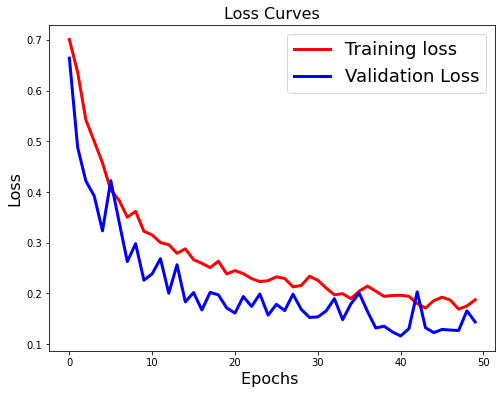

In [16]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [15]:
#testing - accuracy
scores = model.evaluate(valid_gen, batch_size=BATCH_SIZE, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

243/243 [==============================] - 38s 158ms/step - loss: 0.1467 - acc: 0.9470

Test result: 94.703 loss: 0.147


In [56]:
Y_pred = model.predict(valid_gen)

243/243 [==============================] - 36s 147ms/step


In [62]:
Y_pred 

array([[6.0592588e-06],
       [1.0070945e-03],
       [1.3304828e-03],
       ...,
       [8.9001495e-01],
       [9.9903762e-01],
       [9.9999332e-01]], dtype=float32)

In [63]:
y_pred = [1 if i[0] > 0.5 else 0 for i in Y_pred]

In [59]:
#y_pred = np.argmax(Y_pred, axis=1)

In [64]:
np.mean(y_pred == valid_gen.classes )

0.9470340801785561

In [65]:
print(confusion_matrix(valid_gen.classes, y_pred))

[[5696  145]
 [ 472 5336]]


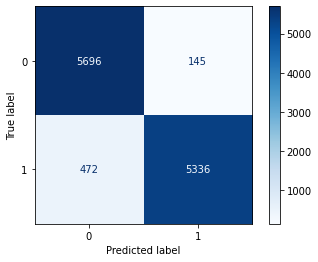

In [66]:
cm = confusion_matrix(valid_gen.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm) #, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
# get predict prob and label 
# ypred = model.predict(valid_gen, verbose=1)
# ypred = np.argmax(ypred, axis=1)

print(classification_report(valid_gen.classes, y_pred) )#, target_names=target_names))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5841
           1       0.97      0.92      0.95      5808

    accuracy                           0.95     11649
   macro avg       0.95      0.95      0.95     11649
weighted avg       0.95      0.95      0.95     11649



## Visualize Feature Maps

In [68]:
# summarize filters in each convolutional layer
# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 64)
conv2d_2 (3, 3, 64, 64)
conv2d_3 (3, 3, 64, 128)
conv2d_4 (3, 3, 128, 128)


In [69]:
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)


0 conv2d (None, 248, 248, 32)
2 conv2d_1 (None, 122, 122, 64)
4 conv2d_2 (None, 59, 59, 64)
6 conv2d_3 (None, 27, 27, 128)
8 conv2d_4 (None, 11, 11, 128)


1/1 [==============================] - 0s 30ms/step
(1, 248, 248, 32)


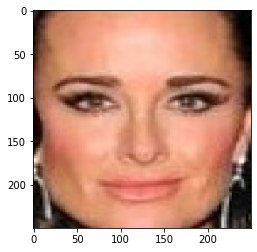

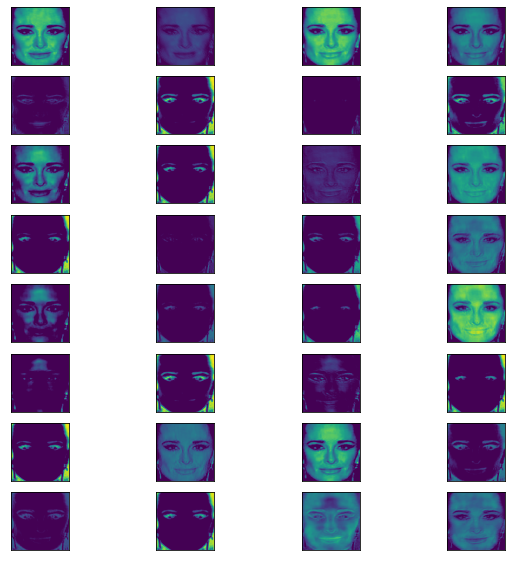

In [85]:
# plot feature map of first conv layer for given image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from numpy import expand_dims
from tensorflow.keras.models import Model


# redefine model to output right after input layer
model_fm = Model(inputs=model.inputs, outputs=model.layers[0].output)

# load the image with the required shape
img = load_img('/nfs/home/twd1956/DeepLearning/Project/Training/female/202598.jpg.jpg', target_size=(250, 250, 3))
plt.imshow(img)
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image
img = preprocess_input(img)
# plt.show()
# get feature map for first hidden layer
feature_maps = model_fm.predict(img)
print(feature_maps.shape)
# plot all 64 maps in an 8x4 matrix
height = 8
width = 4
ix = 1

plt.figure(figsize=(10, 10))
for _ in range(height):
    for _ in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(height, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1])
        ix += 1
# show the figure
plt.show()

1/1 [==============================] - 0s 44ms/step
(1, 122, 122, 64)


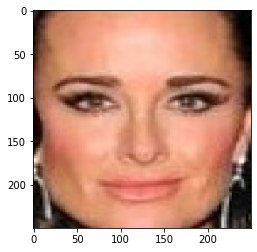

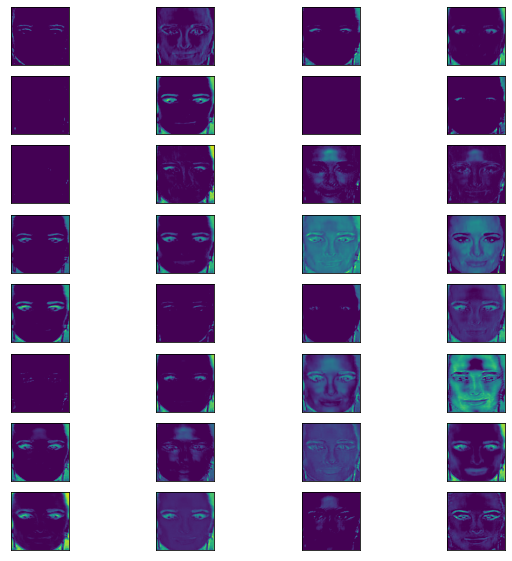

In [86]:
# redefine model to output right after the second hidden layer
model_fm = Model(inputs=model.inputs, outputs=model.layers[2].output)

# load the image with the required shape
img = load_img('/nfs/home/twd1956/DeepLearning/Project/Training/female/202598.jpg.jpg', target_size=(250, 250, 3))
plt.imshow(img)
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image
img = preprocess_input(img)
# plt.show()
# get feature map for first hidden layer
feature_maps = model_fm.predict(img)
print(feature_maps.shape)
# plot all 64 maps in an 8x4 matrix
height = 8
width = 4
ix = 1

plt.figure(figsize=(10, 10))
for _ in range(height):
    for _ in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(height, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1])
        ix += 1
# show the figure
plt.show()

1/1 [==============================] - 0s 50ms/step
(1, 59, 59, 64)


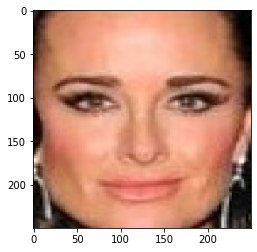

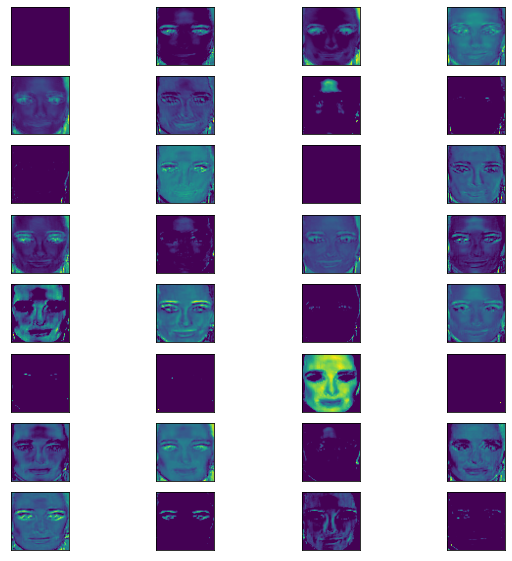

In [88]:
# redefine model to output right after the fourth hidden layer
model_fm = Model(inputs=model.inputs, outputs=model.layers[4].output)

# load the image with the required shape
img = load_img('/nfs/home/twd1956/DeepLearning/Project/Training/female/202598.jpg.jpg', target_size=(250, 250, 3))
plt.imshow(img)
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image
img = preprocess_input(img)
# plt.show()
# get feature map for first hidden layer
feature_maps = model_fm.predict(img)
print(feature_maps.shape)
# plot all 64 maps in an 8x4 matrix
height = 8
width = 4
ix = 1

plt.figure(figsize=(10, 10))
for _ in range(height):
    for _ in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(height, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1]) #, cmap='gray')
        ix += 1
# show the figure
plt.show()

1/1 [==============================] - 0s 57ms/step
(1, 27, 27, 128)


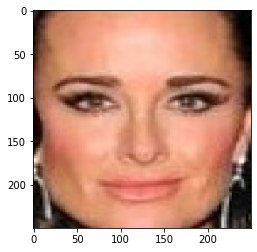

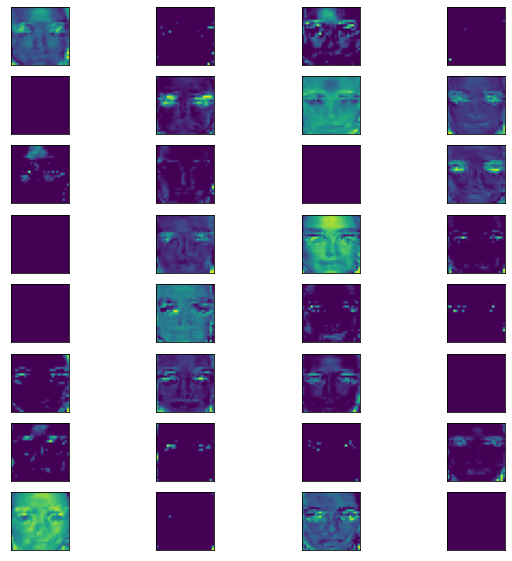

In [89]:
# redefine model to output right after the sixth hidden layer
model_fm = Model(inputs=model.inputs, outputs=model.layers[6].output)

# load the image with the required shape
img = load_img('/nfs/home/twd1956/DeepLearning/Project/Training/female/202598.jpg.jpg', target_size=(250, 250, 3))
plt.imshow(img)
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image
img = preprocess_input(img)
# plt.show()
# get feature map for first hidden layer
feature_maps = model_fm.predict(img)
print(feature_maps.shape)
# plot all 64 maps in an 8x4 matrix
height = 8
width = 4
ix = 1

plt.figure(figsize=(10, 10))
for _ in range(height):
    for _ in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(height, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1]) #, cmap='gray')
        ix += 1
# show the figure
plt.show()

1/1 [==============================] - 0s 63ms/step
(1, 11, 11, 128)


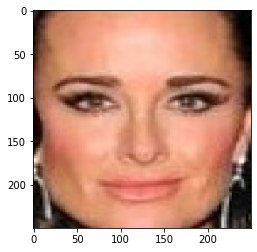

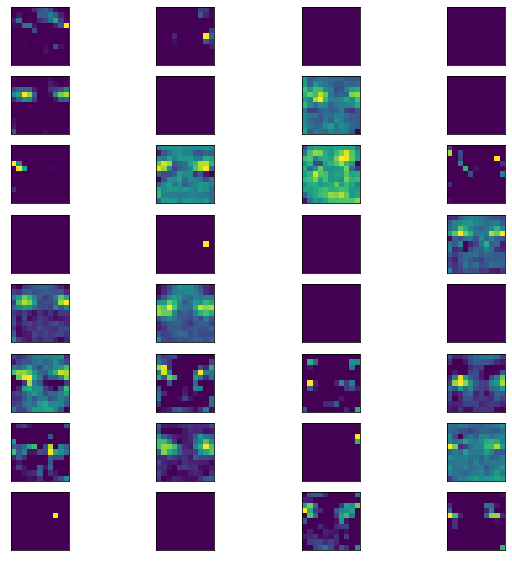

In [84]:
# redefine model to output right after the eighth hidden layer
model_fm = Model(inputs=model.inputs, outputs=model.layers[8].output)

# load the image with the required shape
img = load_img('/nfs/home/twd1956/DeepLearning/Project/Training/female/202598.jpg.jpg', target_size=(250, 250, 3))
plt.imshow(img)
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image
img = preprocess_input(img)
# plt.show()
# get feature map for first hidden layer
feature_maps = model_fm.predict(img)
print(feature_maps.shape)
# plot all 64 maps in an 8x4 matrix
height = 8
width = 4
ix = 1

plt.figure(figsize=(10, 10))
for _ in range(height):
    for _ in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(height, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1])
        ix += 1
# show the figure
plt.show()